In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#读取实验数据,X增加一列1
def get_data(file):
    data = load_svmlight_file(file,n_features=123)
    b = np.ones(data[0].toarray().shape[0])
    X = np.column_stack((data[0].toarray(), b))
    return X, data[1]

In [3]:
class LinearClassifier(object):
    def __init__(self):
        self.W = None

class LinearSVM(LinearClassifier):
  def loss(self, X_batch, y_batch, reg):
    return svm_loss_vectorized(self.W, X_batch, y_batch, reg)

  def Adadelta(self, X, y, X_val, y_val, batch_num=256, reg=1e-5, num_iters=100):
      numSamples_train, numFeatures = np.shape(X)  # 获取训练样本的规模
      numSamples_valid, numFeatures2 = np.shape(X_val)  # 获取训练样本的规模

      # 计算类别总数，类别为(0,1...,k)
      num_classes = np.max(y) + 1
      # 初始化W
      self.W = np.zeros((numFeatures, num_classes))
  
      Lvalid = []
      rho = 0.999
      s = 0
      eps = 1e-8
      deltaX = 0
      #计算损失
      loss_valid, grad2 = self.loss(X_val, y_val, reg)
      Lvalid.append(loss_valid)
      # 梯度下降去优化 W
      for it in range(num_iters):
          delta = 0
          # 批处理数batch_num
          x_batch=[]
          y_batch=[]
          for i in range(batch_num):
              r = np.random.randint(0, numSamples_train)  # 随机选一个样本计算梯度
              x_batch.append(X[r, :])
              y_batch.append(y[r])

          x_batch=np.array(x_batch)
          y_batch=np.array(y_batch)
          loss_batch, grad = self.loss(x_batch, y_batch, reg)
          #Adadelta计算
          g = grad
          g2 = g * g
          var1 = rho * s
          var2 = (1.0 - rho)
          var3 = var2 * g2
          s = var1 + var3

          var4 = s + eps
          var5 = (np.sqrt(var4))

          var6 = deltaX + eps
          var7 = np.sqrt(var6)

          var8 = var7 / (var5)
          gpi = var8 * g

          var9 = rho * deltaX
          var10 = var2 * gpi
          var11 = var10 * gpi

          deltaX = var9 + var11
          self.W = self.W - gpi
          # 计算损失
          loss_valid, grad2 = self.loss(X_val, y_val, reg)
          Lvalid.append(loss_valid)
      return Lvalid


  def RMSProp(self, X, y, X_val, y_val, batch_num=256, reg=1e-5, num_iters=100):
      numSamples_train, numFeatures = np.shape(X)  # 获取训练样本的规模
      numSamples_valid, numFeatures2 = np.shape(X_val)  # 获取训练样本的规模

      # 计算类别总数，类别为(0,1...,k)
      num_classes = np.max(y) + 1
      # 初始化W
      self.W = np.zeros((numFeatures, num_classes))
      
      alpha = 0.001  # 迭代步长
      Lvalid = []
      gamma = 0.99
      s = 0
      eps = 1e-5

      # 梯度下降去优化 W
      loss_valid, grad2 = self.loss(X_val, y_val, reg)
      Lvalid.append(loss_valid)
      for it in range(num_iters):
          delta = 0
          # 批处理数batch_num
          x_batch=[]
          y_batch=[]
          for i in range(batch_num):
              r = np.random.randint(0, numSamples_train)  # 随机选一个样本计算梯度
              x_batch.append(X[r, :])
              y_batch.append(y[r])

          x_batch=np.array(x_batch)
          y_batch=np.array(y_batch)
          loss_batch, grad = self.loss(x_batch, y_batch, reg)
          #RMSProp计算
          g = grad
          g2 = g * g
          var1 = gamma * s
          var2 = (1.0 - gamma)
          var3 = var2 * g2
          s = var1 + var3

          var4 = s + eps
          var5 = (np.sqrt(var4))
          var6 = alpha / (var5)
          gpi = var6 * g
          self.W = self.W - gpi
          # 计算损失
          loss_valid, grad2 = self.loss(X_val, y_val, reg)
          Lvalid.append(loss_valid)
      return Lvalid

  def Adam(self, X, y, X_val, y_val, batch_num=256, reg=1e-5, num_iters=100):
      numSamples_train, numFeatures = np.shape(X)  # 获取训练样本的规模
      numSamples_valid, numFeatures2 = np.shape(X_val)  # 获取训练样本的规模

      # 计算类别总数，类别为(0,1...,k)
      num_classes = np.max(y) + 1
      # 初始化W
      self.W = np.zeros((numFeatures, num_classes))
 
      alpha = 0.01  # 迭代步长
      Lvalid = []
      bata1 = 0.9
      bata2 = 0.999
      s = 0
      v = 0
      eps = 1e-5

      # 梯度下降去优化 W
      loss_valid, grad2 = self.loss(X_val, y_val, reg)
      Lvalid.append(loss_valid)
      for it in range(num_iters):
          delta = 0
          # 批处理数batch_num
          x_batch=[]
          y_batch=[]
          for i in range(batch_num):
              r = np.random.randint(0, numSamples_train)  # 随机选一个样本计算梯度
              x_batch.append(X[r, :])
              y_batch.append(y[r])

          x_batch=np.array(x_batch)
          y_batch=np.array(y_batch)
          loss_batch, grad = self.loss(x_batch, y_batch, reg)
          #Adam计算
          g = grad
          t = it + 1
          g2 = g * g
          v = bata1 * v + (1 - bata1) * g
          s = bata2 * s + (1 - bata2) * g2

          v_head = v / (1.0 - bata1 ** t)
          s_head = s / (1.0 - bata2 ** t)

          gpi = (alpha * v_head) / np.sqrt(s_head + eps)

          self.W = self.W - gpi

          loss_valid, grad2 = self.loss(X_val, y_val, reg)
          Lvalid.append(loss_valid)
      return Lvalid


  def NAG(self, X, y, X_val, y_val, batch_num=256, reg=1e-5, num_iters=100):
      numSamples_train, numFeatures = np.shape(X)  # 获取训练样本的规模
      numSamples_valid, numFeatures2 = np.shape(X_val)  # 获取训练样本的规模

      # 计算类别总数，类别为(0,1...,k)
      num_classes = np.max(y) + 1
      # 初始化W
      self.W = np.zeros((numFeatures, num_classes))

      alpha = 0.01  
      Lvalid = []
      rho = 0.999
      v = 0

      # 梯度下降去优化 W
      loss_valid, grad2 = self.loss(X_val, y_val, reg)
      Lvalid.append(loss_valid)
      for it in range(num_iters):
          delta = 0
          # 批处理数batch_num
          x_batch=[]
          y_batch=[]
          for i in range(batch_num):
              r = np.random.randint(0, numSamples_train)  # 随机选一个样本计算梯度
              x_batch.append(X[r, :])
              y_batch.append(y[r])

          x_batch=np.array(x_batch)
          y_batch=np.array(y_batch)
          W_temp=self.W
          self.W=self.W- rho * v
          loss_batch, grad = self.loss(x_batch, y_batch, reg)
          self.W=W_temp
          #NAG计算
          g = grad   # g = grad- rho * v
          v = rho * v + alpha * g
          self.W = self.W - v
          #计算损失
          loss_valid, grad2 = self.loss(X_val, y_val, reg)
          Lvalid.append(loss_valid)
      return Lvalid

In [4]:
#向量化计算梯度
def svm_loss_vectorized(W, X, y, reg):
  loss = 0.0
  # 初始化gradient为0
  dW = np.zeros(W.shape)
  XW = X.dot(W)
  num_train = X.shape[0]
  Sy = np.zeros(num_train)
#Sy[i]是正确的分类
  for i in range(num_train):
    Sy[i] = XW[i, y[i]]
#deltal设置1(如果一个正确分类的分值和举例它最近的错误分类的分值的差距是deltal)
  WX = XW.T - Sy + 1
#计算梯度和损失函数
  for i in range(num_train):
    WX[y[i],i] -= 1

  loss = np.sum( WX[WX > 0] )
  loss /= num_train

  XW = WX.T
  num_classes = W.shape[1]
  for i in range(num_train):
    for j in range(num_classes):
      if (XW[i, j] > 0):
        dW[:,j] += X[i,:].T
        dW[:,y[i]] -= X[i,:].T

  dW /= num_train
  dW += reg * W
  return loss, dW

In [5]:
def run_svm():
    #读取实验训练集
    X_train, y_train = get_data("C:\workspace\DeepLearningTest\data/a9a.txt")
    temp = []
    for item in y_train:
        if item > 0:
            temp.append(1)
        else:
            temp.append(0)

    y_train = np.array(temp)

    #读取实验验证集
    X_val, y_val = get_data("C:\workspace\DeepLearningTest\data/a9a.t.txt")
    temp = []
    for item in y_val:
        if item > 0:
            temp.append(1)
        else:
            temp.append(0)

    y_val = np.array(temp)


    #学习率和正则化参数
    learning_rates = 0.01
    regularization_strengths = 1

    batch_num = 256

    #迭代次数
    iters = 100
    svm = LinearSVM()

    L_Adadelta=svm.Adadelta(X_train, y_train, X_val,y_val,batch_num, regularization_strengths, iters)
    L_RMSProp = svm.RMSProp(X_train, y_train, X_val, y_val, batch_num, regularization_strengths, iters)
    L_Adam = svm.Adam(X_train, y_train, X_val, y_val, batch_num, regularization_strengths, iters)
    L_NAG = svm.NAG(X_train, y_train, X_val, y_val, batch_num, regularization_strengths, iters)

    plt.plot(L_Adadelta,label='L_Adadelta')
    plt.plot(L_RMSProp, label='L_RMSProp')
    plt.plot(L_Adam, label='L_Adam')
    plt.plot(L_NAG, label='L_NAG')
    
    plt.legend()
    plt.show()
    plt.show()

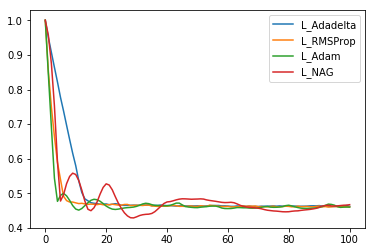

In [6]:
run_svm()